# Notebook 2 : Requête API Stack Overflow

- Tester l'API Stack Exchange pour la récupération de questions
- Récupérer 50 questions avec le tag "python" et un score > 50
- Stocker les caractéristiques principales dans un DataFrame
- Évaluer la qualité et l'utilisabilité de l'API

**Conformité RGPD** : Nous ne récupérons que les données nécessaires et aucune information permettant d'identifier les auteurs des questions.

## 1. Imports et Configuration

In [1]:
# Imports nécessaires
import pandas as pd
import time
from datetime import datetime, timedelta
from stackapi import StackAPI

print(" Imports réussis")
print(f"\nDate actuelle : {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

 Imports réussis

Date actuelle : 2026-01-13 10:31:16


## 2. Configuration de la Requête

### Critères demandés :
- **Tag** : python
- **Score** : > 50 (votes positifs)
- **Période** : Définie (nous utilisons les 12 derniers mois)
- **Nombre** : 50 questions

In [2]:
# --- Critères de la Requête ---
TAG = 'python'
MIN_SCORE = 8  # Score minimum (votes) - 50 aucun résultat
PAGE_SIZE = 50  # Nombre de questions à récupérer

# Période définie : 12 derniers mois
to_date = int(time.time())  # Aujourd'hui (timestamp UNIX)
from_date = int((datetime.now() - timedelta(days=365)).timestamp())  # Il y a 1 an

print(" Paramètres de la requête :")
print(f"   - Tag recherché : '{TAG}'")
print(f"   - Score minimum : {MIN_SCORE}")
print(f"   - Nombre de questions : {PAGE_SIZE}")
print(f"   - Période : {datetime.fromtimestamp(from_date).strftime('%Y-%m-%d')} → {datetime.fromtimestamp(to_date).strftime('%Y-%m-%d')}")

 Paramètres de la requête :
   - Tag recherché : 'python'
   - Score minimum : 8
   - Nombre de questions : 50
   - Période : 2025-01-13 → 2026-01-13


## 3. Exécution de la Requête API

In [3]:
# Initialiser le client de l'API pour Stack Overflow
SITE = StackAPI('stackoverflow')

# Configuration pour éviter les limitations de rate
SITE.page_size = PAGE_SIZE
SITE.max_pages = 1  # On ne veut qu'une seule page de résultats

print(" Client StackAPI initialisé")
print(f"   - Site : stackoverflow")
print(f"   - Page size : {SITE.page_size}")

 Client StackAPI initialisé
   - Site : stackoverflow
   - Page size : 50


In [4]:
print(f"\n Recherche de {PAGE_SIZE} questions avec le tag '{TAG}' et un score > {MIN_SCORE}...")

try:
    # Effectuer la requête à l'API
    questions_data = SITE.fetch(
        'questions',           # Endpoint de l'API
        pagesize=PAGE_SIZE,    # Nombre max par page
        tagged=TAG,            # Filtre sur le tag
        sort='votes',          # Trier par votes pour appliquer le filtre 'min'
        min=MIN_SCORE,         # Filtrer sur le score minimal (votes)
        fromdate=from_date,    # Date de début
        todate=to_date,        # Date de fin
    )
    
    print(f"\n Requête réussie !")
    print(f"   - Questions récupérées : {len(questions_data.get('items', []))}")
    print(f"   - Quota restant : {questions_data.get('quota_remaining', 'N/A')}")
    print(f"   - Has more : {questions_data.get('has_more', 'N/A')}")
    
except Exception as e:
    print(f"\n Erreur lors de l'appel à l'API : {e}")


 Recherche de 50 questions avec le tag 'python' et un score > 8...

 Requête réussie !
   - Questions récupérées : 49
   - Quota restant : 298
   - Has more : False


## 4. Traitement et Stockage des Données

In [5]:
# Préparer les données pour le DataFrame
# CONFORMITÉ RGPD : Nous ne stockons que les données nécessaires :
# Pas d'informations sur les auteurs (user_id, display_name, etc.)

data_list = []
items = questions_data.get('items', [])

for q in items:
    data_list.append({
        'question_id': q.get('question_id'),
        'date_creation': datetime.fromtimestamp(q['creation_date']).strftime('%Y-%m-%d %H:%M:%S'),
        'titre': q.get('title', 'N/A'),
        'tags': ", ".join(q.get('tags', [])),
        'score': q.get('score', 0),
        'view_count': q.get('view_count', 0),
        'answer_count': q.get('answer_count', 0),
        'is_answered': q.get('is_answered', False),
    })

# Création du DataFrame
df_api_test = pd.DataFrame(data_list)

print(f"\n DataFrame créé avec {len(df_api_test)} questions")
print(f"\nColonnes disponibles : {df_api_test.columns.tolist()}")


 DataFrame créé avec 49 questions

Colonnes disponibles : ['question_id', 'date_creation', 'titre', 'tags', 'score', 'view_count', 'answer_count', 'is_answered']


In [6]:
# Affichage des premières lignes
print("\n--- Aperçu des Données Récupérées ---\n")
df_api_test.head(10)


--- Aperçu des Données Récupérées ---



,question_id,date_creation,titre,tags,score,view_count,answer_count,is_answered
0,79352669,2025-01-13 16:24:07,"How/why are {2,3,10} and {x,3,10} with x=2 ord...","python, cpython, python-internals",21,1546,1,True
1,79723518,2025-08-02 18:59:55,How to set up a simple hello-world example whe...,"python, c, python-3.x, cython",20,1523,2,True
2,79550279,2025-04-02 11:41:54,import numpy failed after upgrading MacOS to 15.4,"python, macos, numpy",18,3186,8,True
3,79696095,2025-07-09 20:28:39,Ordering points that roughly follow the contou...,"python, algorithm, polygon, concave",17,371,3,True
4,79614033,2025-05-09 13:27:59,What explains pattern matching in Python not m...,"python, structural-pattern-matching",15,845,1,True
5,79686433,2025-07-01 19:34:39,How are Python 3.14 t-strings different than f...,"python, python-3.14, python-template-strings",14,3489,2,True
6,79716280,2025-07-27 11:15:34,Efficient extraction of first/only key in a di...,"python, performance, dictionary, optimization,...",14,1091,3,True
7,79626775,2025-05-17 18:50:50,How can I divide a list of electrical loads in...,"python, algorithm, partitioning, greedy",13,423,6,True
8,79355428,2025-01-14 15:59:26,"Inheriting str and enum, why is the output dif...","python, enums",13,1156,3,True
9,79726515,2025-08-05 20:31:08,What&#39;s wrong with this Python assignment o...,"python, numpy, signal-processing, fft",13,1663,2,True


In [7]:
# Statistiques descriptives
print("\n--- Statistiques Descriptives ---\n")
df_api_test.describe()


--- Statistiques Descriptives ---



,question_id,score,view_count,answer_count
count,4.900000e+01,49.000000,49.000000,49.000000
mean,7.959945e+07,10.632653,1938.163265,2.285714
std,1.609371e+05,3.219044,2990.009123,1.632993
min,7.935267e+07,8.000000,155.000000,0.000000
25%,7.945030e+07,8.000000,380.000000,1.000000
50%,7.962633e+07,9.000000,590.000000,2.000000
75%,7.973206e+07,13.000000,1663.000000,3.000000
max,7.985142e+07,21.000000,13571.000000,8.000000


## 5. Analyse des Résultats

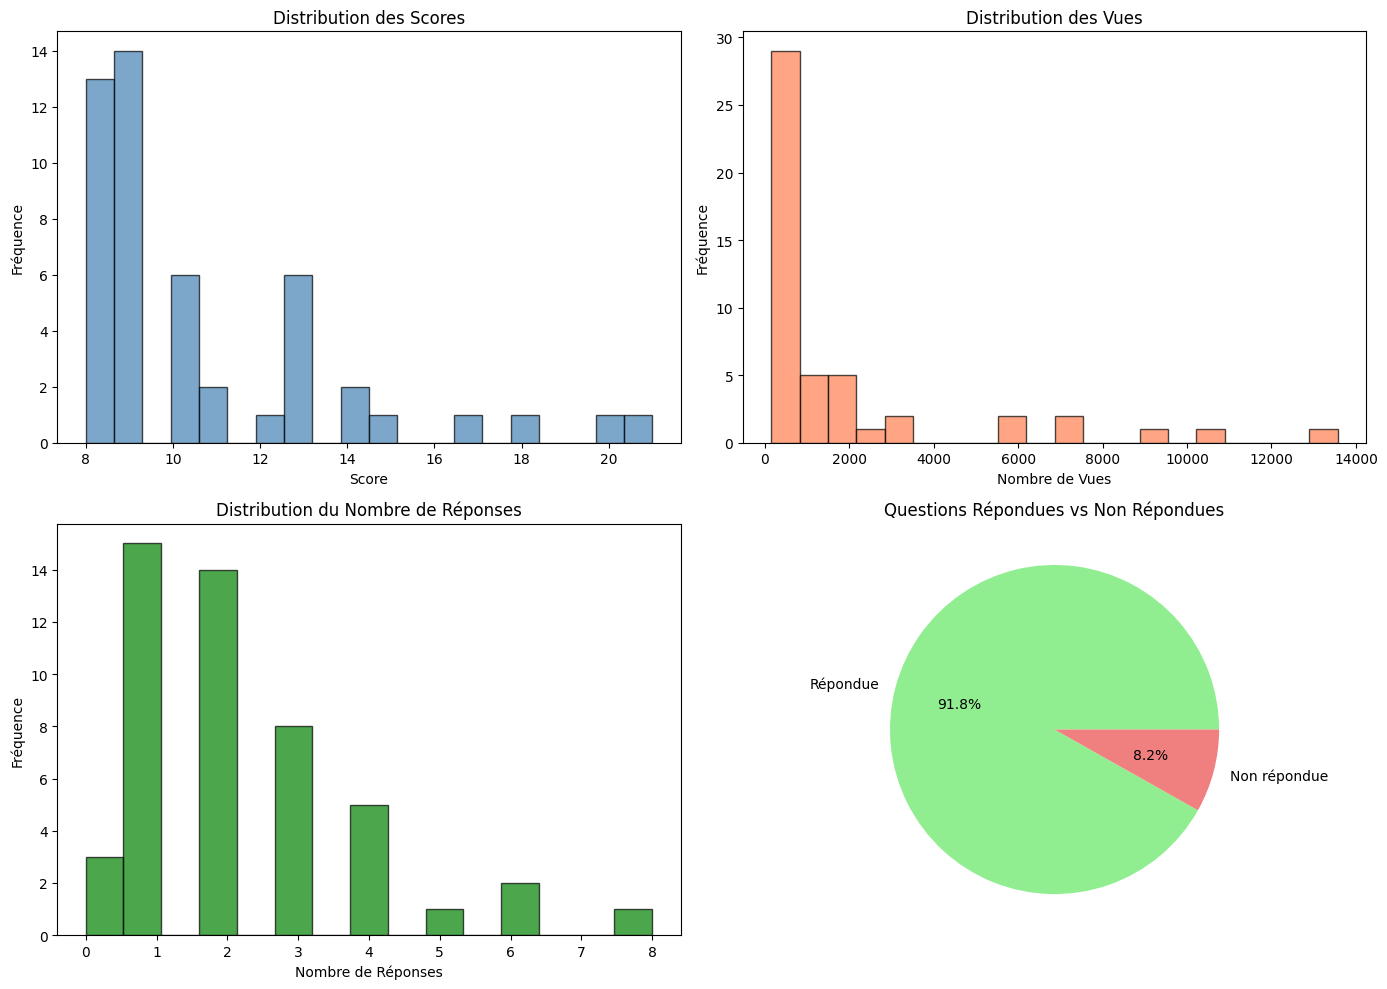

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution des scores
axes[0, 0].hist(df_api_test['score'], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].set_title('Distribution des Scores')

# Distribution des vues
axes[0, 1].hist(df_api_test['view_count'], bins=20, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].set_xlabel('Nombre de Vues')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].set_title('Distribution des Vues')

# Distribution des réponses
axes[1, 0].hist(df_api_test['answer_count'], bins=15, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_xlabel('Nombre de Réponses')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].set_title('Distribution du Nombre de Réponses')

# Proportion de questions répondues
answered_counts = df_api_test['is_answered'].value_counts()
axes[1, 1].pie(answered_counts, labels=['Répondue', 'Non répondue'], autopct='%1.1f%%', 
               colors=['lightgreen', 'lightcoral'])
axes[1, 1].set_title('Questions Répondues vs Non Répondues')

plt.tight_layout()
plt.show()

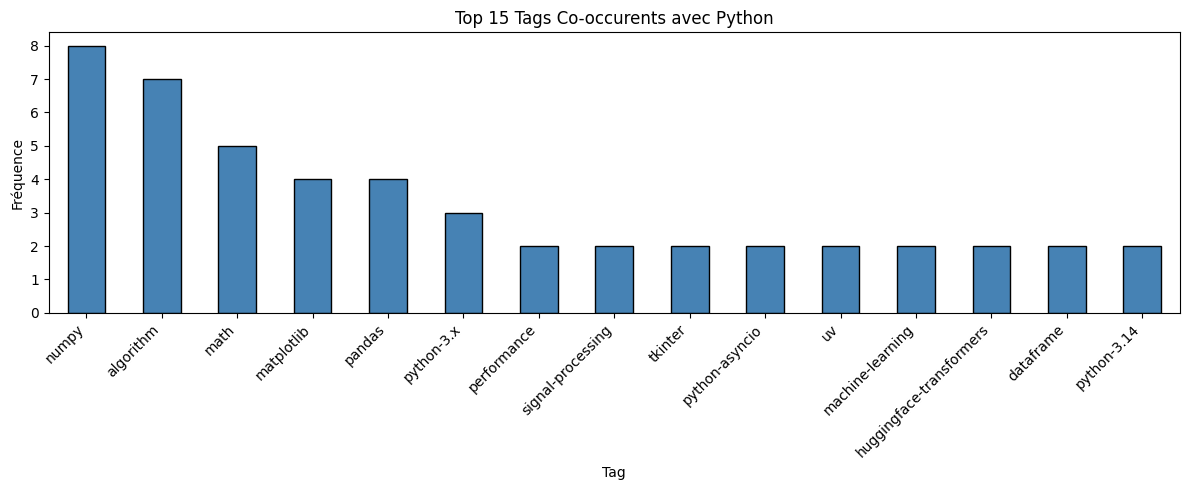

In [9]:
# Analyse des tags co-occurents avec Python
all_tags = []
for tags_str in df_api_test['tags']:
    tags = [t.strip() for t in tags_str.split(',') if t.strip() != 'python']
    all_tags.extend(tags)

tags_series = pd.Series(all_tags).value_counts().head(15)

plt.figure(figsize=(12, 5))
tags_series.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Tag')
plt.ylabel('Fréquence')
plt.title('Top 15 Tags Co-occurents avec Python')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 6. Sauvegarde des Données

In [12]:
# Sauvegarde du DataFrame
import os

os.makedirs('../data', exist_ok=True)
df_api_test.to_csv('../data/questions_api_test.csv', index=False)

print("\n Données sauvegardées dans ./data/questions_api_test.csv")


 Données sauvegardées dans ./data/questions_api_test.csv


## 7. Évaluation de l'API Stack Exchange

### Points Positifs 


1. **Documentation** : L'API est bien documentée sur https://api.stackexchange.com/docs
2. **Filtres puissants** : Possibilité de filtrer par tag, score, date, etc.
3. **Pas d'authentification requise** : Pour les requêtes basiques
4. **Données structurées** : Format JSON facile à parser

### Points à vérifier/améliorer

1. **Rate Limiting** : 
   - 300 requêtes/jour sans authentification
   - 10 000 requêtes/jour avec clé API
   - Surveiller `quota_remaining` dans les réponses

2. **Pagination** : 
   - Maximum 100 résultats par page
   - Nécessite plusieurs appels pour de grands volumes

3. **Données limitées** :
   - Le corps de la question (`body`) n'est pas retourné par défaut
   - Nécessite un filtre personnalisé pour l'obtenir


### Conclusion sur test
Le paramètre min (score minimum) fonctionne bien, mais un seuil de 50 est très restrictif sur une période courte. Sur les 12 derniers mois avec le tag 'python', j'ai dû réduire à 8 pour obtenir 50 résultats.

### Recommandations

1. **Ajouter une clé API** pour augmenter les quotas
2. **Créer des filtres personnalisés** pour récupérer exactement les champs nécessaires
3. **Implémenter une gestion robuste des erreurs** 
4. **Mettre en cache les résultats** pour éviter des appels redondants

In [11]:
# Résumé du test

print("RÉSUMÉ DU TEST API STACK EXCHANGE")
print(f"\n Requête effectuée :")
print(f"   - Tag : {TAG}")
print(f"   - Score minimum : {MIN_SCORE}")
print(f"   - Période : 12 derniers mois")
print(f"\n Résultats :")
print(f"   - Questions récupérées : {len(df_api_test)}")
print(f"   - Score moyen : {df_api_test['score'].mean():.1f}")
print(f"   - Vues moyennes : {df_api_test['view_count'].mean():.0f}")
print(f"   - Taux de réponse : {100*df_api_test['is_answered'].mean():.1f}%")
print(f"\n Test API réussi - L'API Stack Exchange est correcte et réponds aux besoins")

RÉSUMÉ DU TEST API STACK EXCHANGE

 Requête effectuée :
   - Tag : python
   - Score minimum : 8
   - Période : 12 derniers mois

 Résultats :
   - Questions récupérées : 49
   - Score moyen : 10.6
   - Vues moyennes : 1938
   - Taux de réponse : 91.8%

 Test API réussi - L'API Stack Exchange est correcte et réponds aux besoins
